# Module 7 - Predicting Housing Sale Prices

**Adam Hans**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The intended purpose of this project is to build upon Dr. Williams' analysis from the training videos by utilizing regression modeling in python. I will build a linear regression model to predict the sale price of houes based on variable sets I determine after analyzing the data. Hopefully the model will give a stronger score that will be higher than .75. 

[Back to top](#Index)


## 1. Introduction

The purpose of this project is to create a linear regression model that will predict housing sale prices based on cumulative data provided. This data will need to be analyzed and potentially cleaned in order to be used successfully in the model prediction. This project will utilize pandas dataframes, linear regression model from sklearn package and matplotlib histograms and scatter plots to show the visual representation of the data. 

The primary goal is to improve on the R Squared Model score of .75 from the training provided by Dr. Williams and see if other data points can be utilized to improve that score between .8 and .9. The following examples will demonstrate my efforts to make a better prediction model for housing sale prices.

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [2]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('houseSmallData.csv') # this imports the raw data file
data_train = data.iloc[0:100,:] # here we reassign the 100 columns to the variable data_train
data_train.shape # now when we run the shape of the newly reassign data it returns the cols, rows 
data_train

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

In [4]:
salePrice = data_train['SalePrice'] #this will assign pull out the sale price column and assign it to the variable sale price so further analysis can be performed. 
salePrice.describe() #This line of code will return data such as the mean and std dev min and max 


count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

1.1783462304851948

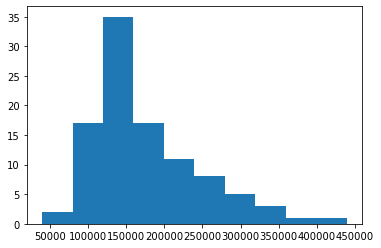

In [5]:
plt.hist(salePrice) #This will plot the histogram of the sale price data to determine skewness
salePrice.skew()

Because the sale price histogram is skewed, the log of the sale price will need to be taken to make this resemble a normal distribution.

### Taking the Log of the Sale Price

-0.09632240207755555

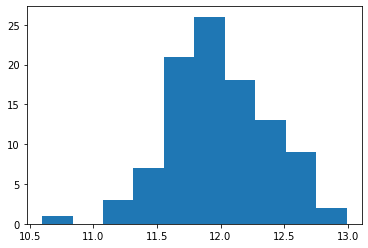

In [6]:
plt.hist(np.log(salePrice)) #This will plot out a new histogram of the log
target = np.log(salePrice) # The data has been modified and reassigned the variable target
np.log(salePrice).skew() #This will calculate the skewness of the log for the sale price

### Exploring Data Variables for Possible Relationships

Here are a few scatter plots to test possible correlation from some of the columns

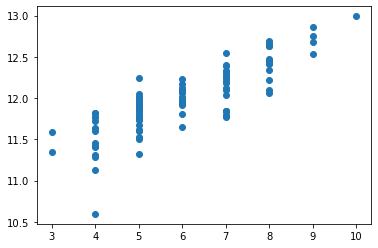

In [7]:
plt.scatter(data_train['OverallQual'], y=target)

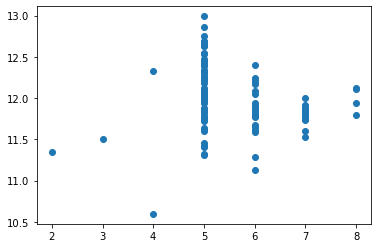

In [8]:
plt.scatter(data_train['OverallCond'], y=target)

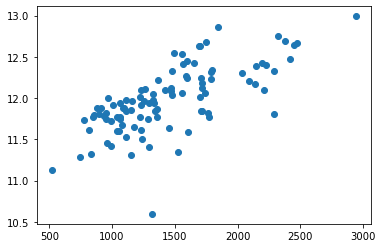

In [9]:
plt.scatter(data_train['GrLivArea'], y=target)

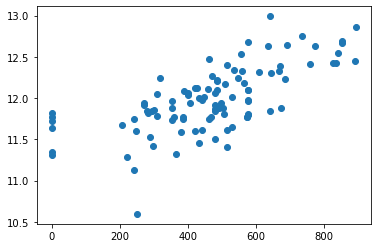

In [10]:
plt.scatter(data_train['GarageArea'], y=target)

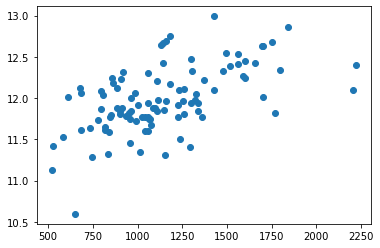

In [11]:
plt.scatter(data_train['1stFlrSF'], y=target)

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


In [12]:
nulls = pd.DataFrame(data_train.isnull().sum().sort_values(ascending=False)[0:20])
#this creates a new df of nulls that are summed by category. 
#This becomes useful when deciding which columns we want to make use to make our predictions and the validity of the data we are comparing it too. 
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
FireplaceQu,54
LotFrontage,14
GarageType,6
GarageYrBlt,6
GarageFinish,6
GarageQual,6


In [13]:
data = data_train.select_dtypes(include=[np.number]).interpolate().dropna(axis = 1)
sum(data.isnull().sum()!=0)
data.shape

(100, 39)

Now that we have filtered the columns to include only the ones with numerical values we see above that our shape has been reduced from 100 X 82 to now only being 100 x 39

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

In [14]:
#select numeric columns
#calculate correlation factor

numeric = data.select_dtypes(include=[np.number]) # this gives us the numeric cols in the data and assigns them to the variable numeric. 
numeric.head()

corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:20] # this gives us the correlation based on the the top 20 data points
cols

SalePrice       1.000000
OverallQual     0.855061
GrLivArea       0.735129
GarageArea      0.688249
GarageCars      0.663441
YearBuilt       0.658636
TotalBsmtSF     0.616297
GarageYrBlt     0.589361
FullBath        0.579505
MasVnrArea      0.571836
TotRmsAbvGrd    0.553603
1stFlrSF        0.550912
YearRemodAdd    0.548330
LotArea         0.497124
Fireplaces      0.487907
WoodDeckSF      0.451241
2ndFlrSF        0.381076
BsmtUnfSF       0.327020
HalfBath        0.319304
OpenPorchSF     0.301960
Name: SalePrice, dtype: float64

Using the numeric value data only, I ran a corr() function to get a better understanding of the Top 20 correlations in the data that pertained to the sale price. These correlations reflect what I had initially assumed when testing a few of the variables using the scatter plots. 

My goal in the analysis below was to run 3 different test, a top 5 analysis, a top 10 analysis, and finally a top 20 analysis. I will use these results to determine which analysis presents the best R2 score from the model. 


[Back to top](#Index)

## 3. Project Description

The analysis I performed improves upon Dr. Williams' because I am calculating several additional correlation data points that were not included in the original analysis, since it only used two columns to build the model. 

By using several additional points, each with their own degree of correlation, helped improve the overall predictions of the model. I noticed when deciding which elements to use that as I included more options and ran the model the R2 score continued to improve. This is why I chose as many as I did. 

Originally when I began to set up the analysis, I started with a smaller pool of data points just to see what the R2 score would be for smaller sets. I have included those data points below in the analysis in addition to my final run of 20 data points. 

[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is an approach for modeling the relationship between two (simple linear regression) or more variables (multiple linear regression). In simple linear regression, one variable is considered the predictor or independent variable, while the other variable is viewed as the outcome or dependent variable.
Here’s the linear regression equation:

**Y = b0 + b1X1 + b2X2 + ... bnXn**

where y is the dependent variable (target value), x1, x2, … xn the independent variable (predictors), b0 the intercept, b1, b2, ... bn the coefficients and n the number of observations.

-towardsdatascience.com

In python, for this project, I am using the scikit-learn libraries to build my model. I will also need to utilize pandas libraries and numpy as well. In order to build my model I will need to define my dependent variable and my independent variables. Once I have these items defined, I will need to fit them to my model. 

>"Fitting the model means finding the optimal values of a and b, so we obtain a line that best fits the data points. A model that is well-fitted produces more accurate outcomes, so only after fitting the model, we can predict the target value using the predictors." - towardatascience.com


[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





### First analysis with using top 5 data correlations

In [30]:
top5 = corr['SalePrice'].sort_values(ascending=False)[0:5].index # this gives us the correlation based on the the top 20 data points
top5

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars'], dtype='object')

In [31]:
# pick out x and y values for model
X = data[top5] #This is my independent variable
Y = data['SalePrice'] #This is my dependent variable
X = X.drop(['SalePrice'],axis = 1) #This drops the Sale Price column from the list of variables. 
X

,OverallQual,GrLivArea,GarageArea,GarageCars
0,7,1710,548,2
1,6,1262,460,2
2,7,1786,608,2
3,7,1717,642,3
4,8,2198,836,3
...,...,...,...,...
95,6,1470,420,2
96,7,1588,472,2
97,4,960,432,1
98,5,835,366,1


Running the model with this top 5 data points returned: 
**R^2 is 0.8309859964337735**

### Second analysis with using top 10 data correlations

In [32]:
top10 = corr['SalePrice'].sort_values(ascending=False)[0:10].index # this gives us the correlation based on the the top 20 data points
top10 

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea'],
      dtype='object')

In [33]:
# pick out x and y values for model
X = data[top10] #This is my independent variable
Y = data['SalePrice'] #This is my dependent variable
X = X.drop(['SalePrice'],axis = 1) #This drops the Sale Price column from the list of variables. 
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea
0,7,1710,548,2,2003,856,2003.0,2,196.0
1,6,1262,460,2,1976,1262,1976.0,2,0.0
2,7,1786,608,2,2001,920,2001.0,2,162.0
3,7,1717,642,3,1915,756,1998.0,1,0.0
4,8,2198,836,3,2000,1145,2000.0,2,350.0
...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0
96,7,1588,472,2,1999,1588,1999.0,2,183.0
97,4,960,432,1,1965,960,1965.0,1,48.0
98,5,835,366,1,1920,458,1920.0,1,0.0


Running the model with this top 10 data points returned: 
**R^2 is 0.851735450635332**

### Final analysis with top 20 results

In [34]:
top20 = corr['SalePrice'].sort_values(ascending=False)[0:20].index # this gives us the correlation based on the the top 20 data points
top20

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'BsmtUnfSF', 'HalfBath', 'OpenPorchSF'],
      dtype='object')

In [37]:
# pick out x and y values for model
X = data[top20] #This is my independent variable
Y = data['SalePrice'] #This is my dependent variable
X = X.drop(['SalePrice'],axis = 1) #This drops the Sale Price column from the list of variables. 
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd,LotArea,Fireplaces,WoodDeckSF,2ndFlrSF,BsmtUnfSF,HalfBath,OpenPorchSF
0,7,1710,548,2,2003,856,2003.0,2,196.0,8,856,2003,8450,0,0,854,150,1,61
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6,1262,1976,9600,1,298,0,284,0,0
2,7,1786,608,2,2001,920,2001.0,2,162.0,6,920,2002,11250,1,0,866,434,1,42
3,7,1717,642,3,1915,756,1998.0,1,0.0,7,961,1970,9550,1,0,756,540,0,35
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9,1145,2000,14260,1,192,1053,490,1,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0,6,680,1993,9765,1,232,790,370,1,63
96,7,1588,472,2,1999,1588,1999.0,2,183.0,6,1588,1999,10264,0,158,0,426,0,29
97,4,960,432,1,1965,960,1965.0,1,48.0,6,960,1965,10921,0,120,0,440,0,0
98,5,835,366,1,1920,458,1920.0,1,0.0,5,835,1950,10625,0,0,0,350,0,0


In [38]:
#build linear regression model 
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
print(f"R^2 is {model.score(X,Y)}")

R^2 is 0.8836177293162799


Having the top 20 values with significant correlations led to the model returning an R2 score of **0.8836177293162799**

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



(array([ 1.,  0.,  5., 17., 23., 35.,  9.,  9.,  0.,  1.]),
 array([-89769.36299575, -72117.79580404, -54466.22861234, -36814.66142063,
        -19163.09422892,  -1511.52703721,  16140.04015449,  33791.6073462 ,
         51443.17453791,  69094.74172962,  86746.30892132]),
 <BarContainer object of 10 artists>)

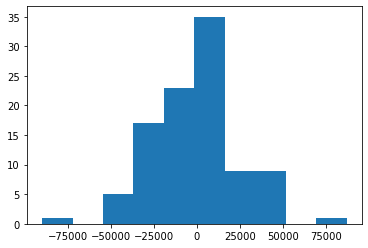

In [39]:
plt.hist(Y - predictions)

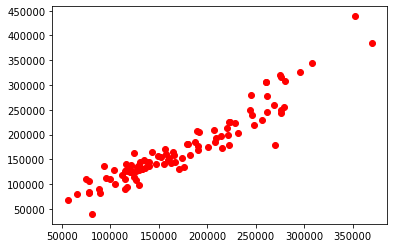

In [40]:
#scatter plot of predictions

plt.scatter(predictions, Y, color='r')

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

In [41]:
data_test = pd.read_csv('jtest.csv') # this imports the raw data file
data_test

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
96,196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
97,197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
98,198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


In [42]:
d_test = data_test.select_dtypes(include=[np.number]).interpolate().dropna(axis = 1)
sum(data_test.isnull().sum()!=0)
d_test.shape

(100, 38)

In [57]:
cols = corr['SalePrice'].sort_values(ascending=False)[0:20].index # this gives us the correlation based on the the top 20 data points
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'BsmtUnfSF', 'HalfBath', 'OpenPorchSF'],
      dtype='object')

#### Need to clean the data because it contains NaN values which would generate an error in the model. 

In [58]:
# pick out x and y values for model
X = d_test[cols] #This is my independent variable
Y = d_test['SalePrice'] #This is my dependent variable
X = X.drop(['SalePrice'],axis = 1) #This drops the Sale Price column from the list of variables. 
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd,LotArea,Fireplaces,WoodDeckSF,2ndFlrSF,BsmtUnfSF,HalfBath,OpenPorchSF
0,6,1610,480,2,1977,1610,1977.0,2,28.0,6,1610,2001,10603,2,168,0,410,0,68
1,6,1732,476,2,1985,741,1985.0,2,336.0,7,977,1985,9206,1,192,755,741,1,46
2,5,1535,410,2,1979,0,1979.0,2,0.0,8,1535,1979,7018,0,0,0,0,0,0
3,7,1226,740,3,2009,1226,2009.0,2,0.0,6,1226,2009,10402,0,0,0,1226,0,36
4,7,1818,240,1,1931,1040,1951.0,1,600.0,7,1226,1950,7758,2,0,592,816,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1456,440,2,1976,855,1976.0,2,0.0,7,855,1976,2280,1,87,601,289,1,0
96,7,1726,786,3,2007,1726,2007.0,2,205.0,8,1726,2007,9416,1,171,0,600,0,138
97,8,3112,795,2,1918,1360,1918.0,2,0.0,8,1360,1990,25419,1,0,1360,140,0,16
98,6,2229,0,0,1912,755,1961.0,1,0.0,8,929,1950,5520,0,0,929,755,0,198


### Model Score 

In [59]:
#build linear regression model 
from sklearn import linear_model

lr = linear_model.LinearRegression()
model_test = lr.fit(X,Y)
predictions = model_test.predict(X)
print(f"R^2 is {model_test.score(X,Y)}")

R^2 is 0.8790181696508726


Running the model against the jtest.csv data, we can see that the model we trained on, while slightly better, still produces a fairly close result with the actual data. This tells me the model is successful in determining the sale prices of the houses. 

(array([ 1.,  3.,  9., 19., 23., 21., 13.,  5.,  4.,  2.]),
 array([-77313.09291896, -61417.12702731, -45521.16113565, -29625.195244  ,
        -13729.22935235,   2166.73653931,  18062.70243096,  33958.66832261,
         49854.63421426,  65750.60010592,  81646.56599757]),
 <BarContainer object of 10 artists>)

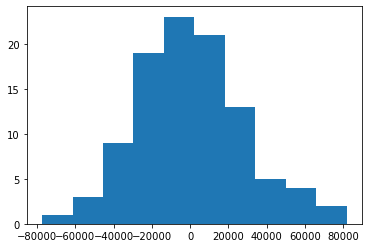

In [60]:
plt.hist(Y - predictions) #This is for error correction to make sure the predictions resemble a normal distribution

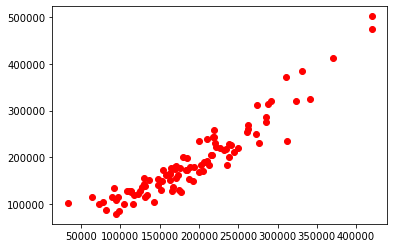

In [61]:
#scatter plot of predictions

plt.scatter(predictions, Y, color='r')

[Back to top](#Index)

## Conclusion

**Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?**

In my analysis of the data, both training and test data, showed me a few important things regarding analysis. The first thing is understanding the data you are working with and if it is "good" data or not. Trying to find the NaN values and eliminate or repair them is crucial. I ran into this issue whenever I ran the model with the jtest data. However, what I failed to do with that data set was clean it. I had only cleaned the training data. Once I cleaned the data for the columns I was using on the test the model worked as intended. 

The second thing I realized, is not to assume just the top correlations render the best results. In my analysis, I ran three test, top 5, top 10, and top 20 correlations. Each time I ran my test my results improved. In relation to this data, it tells me there were numerous data points that contributed to the sale of the house and to not neglect them based purely on their correlation results. It was a combination of all of these values that led to the sale of the home. 

I was surprised by how close the test data R2 score was to the training data. In some of the research I came across while working on this project, that wasn't always the case. Several times the main R2 score would be lower than the training score but still within acceptable limits. This just tells me that the training model was an accurate build. 



[Back to top](#Index
)
## References

Add all references you used to complete this project.

- Stojiljković, Mirko. "Linear Regression in Python." Real Python, 2021 https://realpython.com/linear-regression-in-python/

- Narang, Megha. "How to do Linear Regression in Python." YouTube, 2020 https://www.youtube.com/watch?v=8Uj3_BLEa6s&t=508s

- Andrade, Frank. "A Simple Guide to Linear Regression using Python." towarddatascience.com, 2021 https://towardsdatascience.com/a-simple-guide-to-linear-regression-using-python-7050e8c751c1